<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Copy_of_M5_MP2_NB_Corona_tweets_Classification_of_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Science and Machine Learning
## A Program by IITMadras and TalentSprint
### Mini Project Notebook 02 : Classification of Coronavirus Tweets using NLP Techniques.

## Objectives


* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural network (RNN, LSTM, GRU, CNNs, Bidirectional-LSTM, GRU) to classify the tweets


### Introduction

First we need to understand why sentiment analysis is needed for social media?

People from all around the world have been using social media more than ever. Sentiment analysis on social media data helps to understand the wider public opinion about certain topics such as movies, events, politics, sports, and more and gain valuable insights from this social data. Sentiment analysis has some powerful applications. Nowadays it is also used by some businesses to do market research and understand the customer’s experiences for their products or services.

Now an interesting question about this type of problem statement that may arise in your mind is that why sentiment analysis on COVID-19 Tweets? What is about the coronavirus tweets that would be positive? You may have heard sentiment analysis on movie or book reviews, but what is the purpose of exploring and analyzing this type of data?

The use of social media for communication during the time of crisis has increased remarkably over the recent years. As mentioned above, analyzing social media data is important as it helps understand public sentiment. During the coronavirus pandemic, many people took to social media to express their anger, grief, or sadness while some also spread happiness and positivity. People also used social media to ask their network for help related to vaccines or hospitals during this hard time. Many issues related to this pandemic can also be solved if experts considered this social data. That’s the reason why analyzing this type of data is important to understand the overall issues faced by people.



## Dataset

The given challenge is to build a multiclass classification model to predict the sentiment of Covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done. We are given information like Location, Tweet At, Original Tweet, and Sentiment.

The training dataset consists of 36000 tweets and the testing dataset consists of 8955 tweets. There are 5 sentiments namely ‘Positive’, ‘Extremely Positive’, ‘Negative’, ‘Extremely Negative’, and ‘Neutral’ in the sentiment column.

## Description

This dataset has the following information about the user who tweeted:

1. **UserName:** twitter handler
2. **ScreenName:** a personal identifier on Twitter and is separate from the username
3. **Location:** where in the world the person tweets from
4. **TweetAt:** date of the tweet posted (DD-MM-YYYY)
5. **OriginalTweet:** the tweet itself
6. **Sentiment:** sentiment value



## Problem Statement

To build and implement a multiclass classification deep neural network model to classify between Positive/Extremely Positive/Negative/Extremely Negative/Neutral sentiments

## Grading = 10 Marks

In [ ]:
#@title Download Dataset
%%capture
!pip install --upgrade keras
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_test.csv
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_train.csv


## Import required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)


from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
import re
import string
import nltk

from wordcloud import WordCloud

import keras
from keras.utils import to_categorical
# from keras.preprocessing import text
from keras.utils import pad_sequences
from keras.layers import LSTM
from keras.layers import Bidirectional, Dense, Dropout, Embedding, SpatialDropout1D

from keras.models import Sequential   # the model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  **Data Loading and Perform Exploratory Data Analysis** (2 Points)

* Load the Dataset
  - Use encoding='ISO-8859-1' when reading csv files


In [ ]:
# YOUR CODE HERE
train_data = pd.read_csv('/content/corona_nlp_train.csv', encoding='ISO-8859-1')

* Check for Missing Values and impute/drop them

In [ ]:
# YOUR CODE HERE
train_data.isnull().sum() # check for missing values

,0
UserName,0
ScreenName,0
Location,7484
TweetAt,0
OriginalTweet,0
Sentiment,0


* Visualize the sentiment column values


<Axes: xlabel='Sentiment', ylabel='count'>

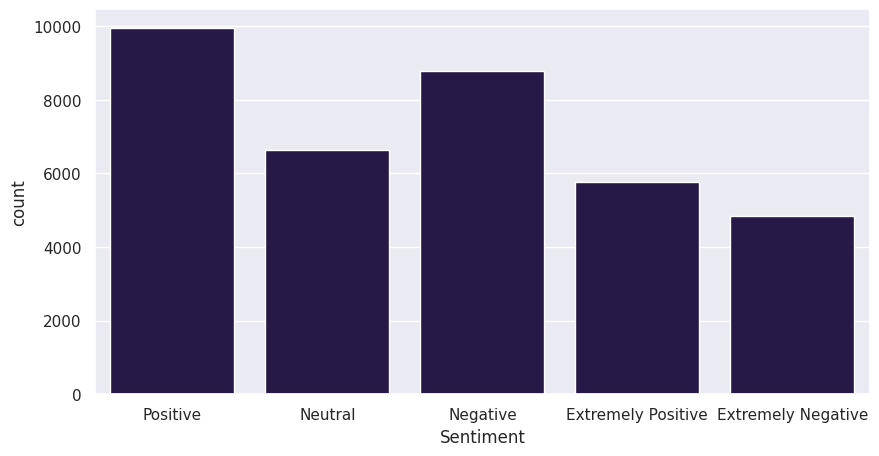

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=train_data) # visualize the sentiment column values

* Visualize top 10 Countries that had the highest tweets using countplot (Tweet count vs Location)


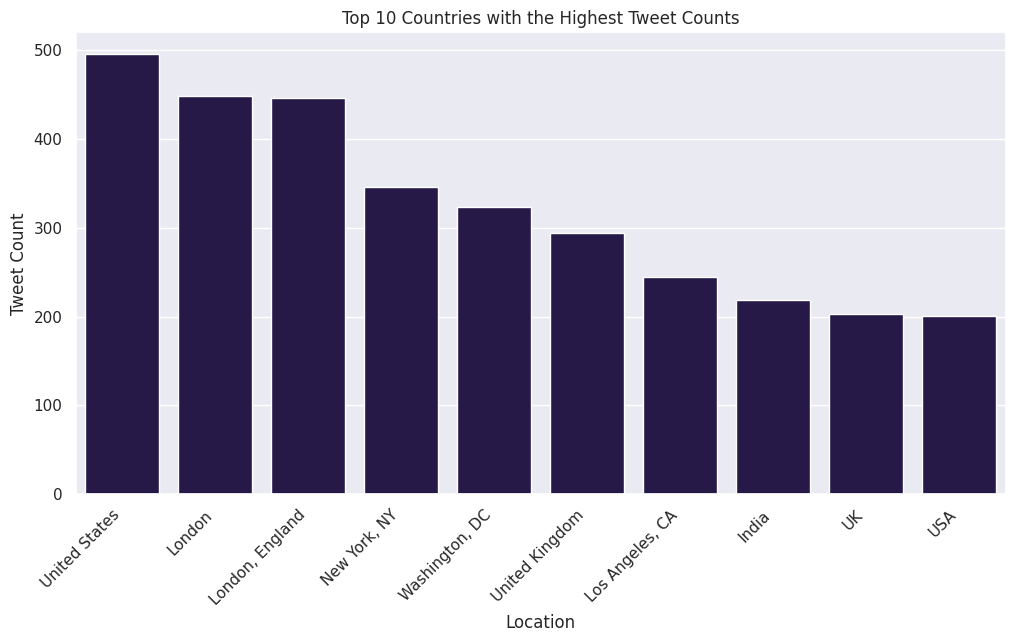

In [ ]:
# YOUR CODE HERE
# Get the top 10 locations
top10_locations = train_data['Location'].value_counts().nlargest(10).index

# Filter the dataframe for the top 10 locations
top10_df = train_data[train_data['Location'].isin(top10_locations)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=top10_df, order=top10_locations)
plt.title('Top 10 Countries with the Highest Tweet Counts')
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.show()

* Plotting Pie Chart for the Sentiments in percentage


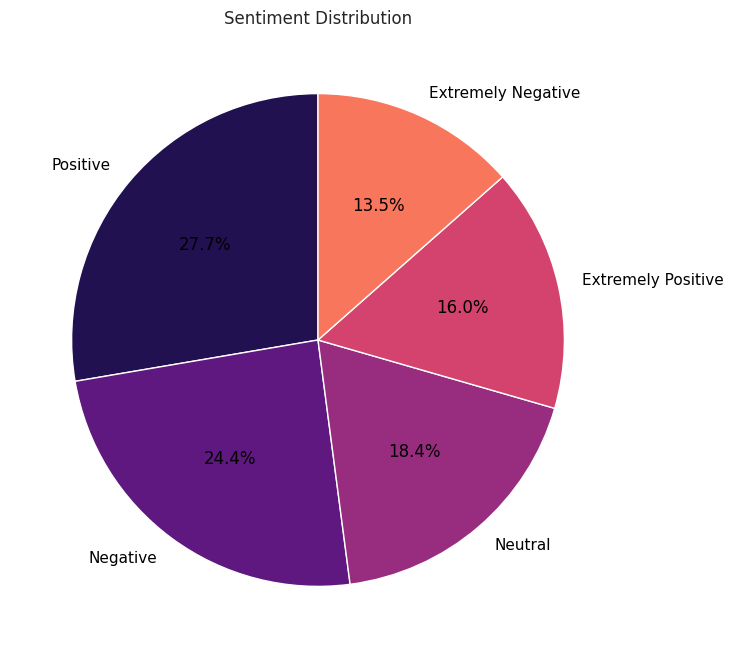

In [ ]:
# YOUR CODE HERE
sentiment_counts = train_data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', textprops={'color': "k"}, startangle=90)
plt.title('Sentiment Distribution')
plt.show()

* WordCloud for the Tweets/Text

    * Visualize the most commonly used words in each sentiment using wordcloud
    * Refer to the following [link](https://medium.com/analytics-vidhya/word-cloud-a-text-visualization-tool-fb7348fbf502) for Word Cloud: A Text Visualization tool




In [ ]:
from nltk.corpus import stopwords

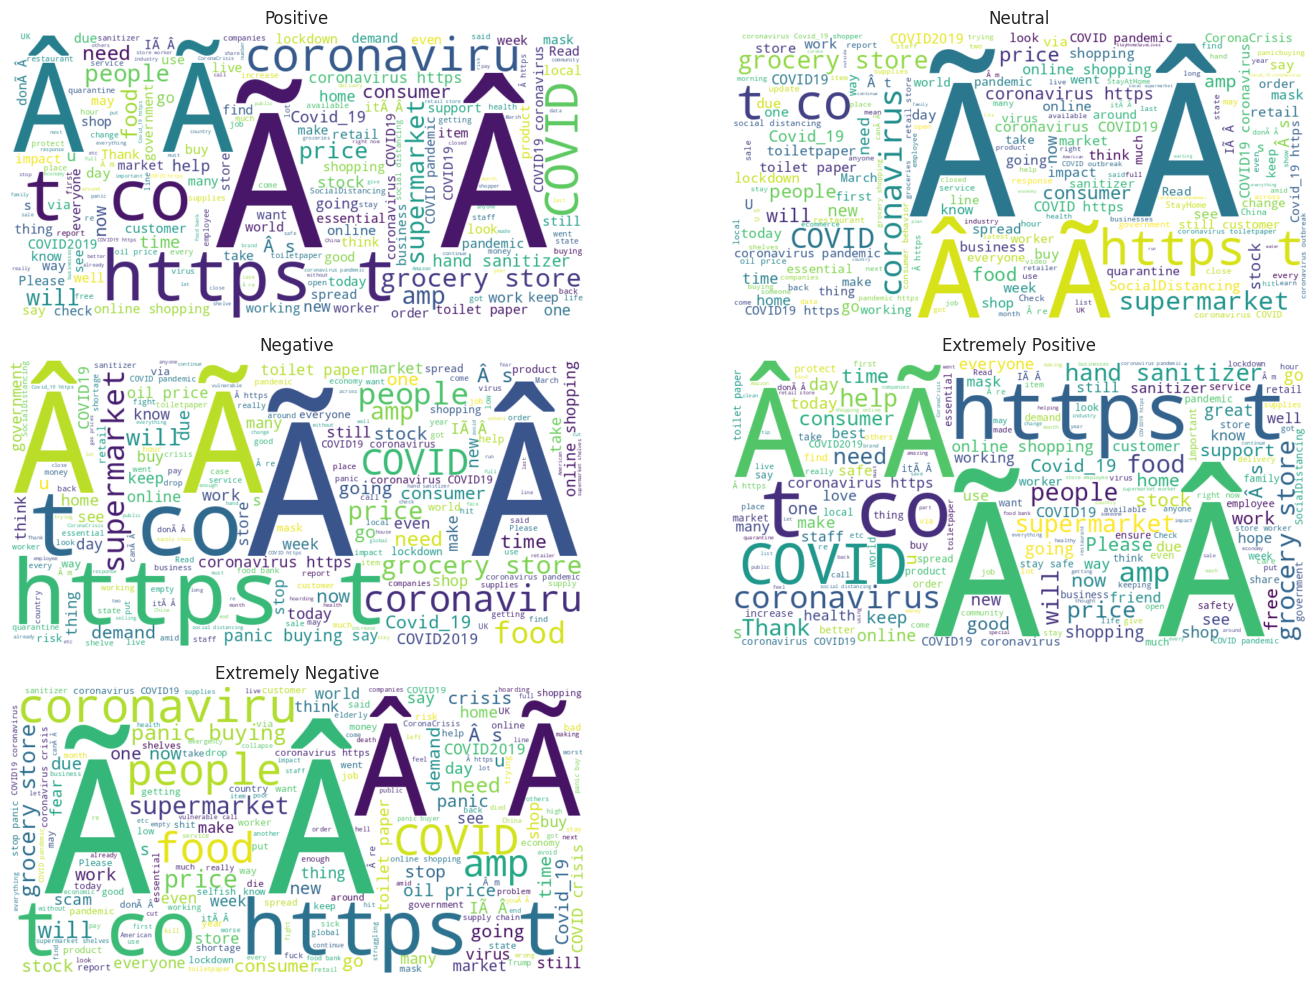

In [ ]:
from wordcloud import WordCloud

# Create a dictionary to store wordclouds for each sentiment
sentiment_wordclouds = {}

for sentiment in train_data['Sentiment'].unique():
  # Filter the dataframe for the current sentiment
  sentiment_df = train_data[train_data['Sentiment'] == sentiment]

  # Combine all tweets for the current sentiment into a single string
  all_tweets = ' '.join(sentiment_df['OriginalTweet'].astype(str).tolist())

  # Create the WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

  # Store the wordcloud in the dictionary
  sentiment_wordclouds[sentiment] = wordcloud

# Display the generated wordclouds
plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiment_wordclouds):
  plt.subplot(3, 2, i + 1)
  plt.imshow(sentiment_wordclouds[sentiment], interpolation='bilinear')
  plt.title(sentiment)
  plt.axis('off')

plt.tight_layout()
plt.show()

##   **Data Pre-Processing**  (2 Points)

####  Clean and Transform the data into a specified format

- Use regex package for cleaning the punctuations and unnecessary symbols
- Encode the categories of tweets i.e. Sentiment column of dataset
- Drop the columns which are not useful for the classification
task
- Remove stop words (Stop words are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.
- Tokenize the sentences
- Set the MAX_NB_WORDS of tokenizer method in keras
- Set MAX_SEQUENCE_LENGTH for padding/trimming sequences of fixed length
-  


In [ ]:
def clean_text(text):
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # remove URLs
  text = re.sub(r'<.*?>', '', text) # remove HTML tags
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove special characters
  text = re.sub(r'Im', '', text)
  text = re.sub(r'covid pandemic\b', 'covid', text, flags=re.IGNORECASE)
  text = re.sub(r'covid_19|covid19|coronaviru|covid2019|covids|covid|coronavirus|pandemic', 'covid', text, flags=re.IGNORECASE) # replace covid-related words with 'covid'
  text = re.sub(r'\bu\b', '', text)
  text = re.sub(r'\b[tT]\b', '', text) # remove single 't' or 'T'
  text = re.sub(r'socialDistancing', 'social distancing', text) # replace 'socialDistancing' with 'social distancing'
  return text

train_data['OriginalTweet_cleaned'] = train_data['OriginalTweet'].apply(lambda x: clean_text(x))

In [ ]:
le = LabelEncoder()
train_data['Sentiment_encoded'] = le.fit_transform(train_data['Sentiment'])
train_data['Sentiment_encoded'].unique()

array([4, 3, 2, 1, 0])

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
  return text

train_data['OriginalTweet_removed_stopwords'] = train_data['OriginalTweet_cleaned'].apply(lambda x: remove_stopwords(x))

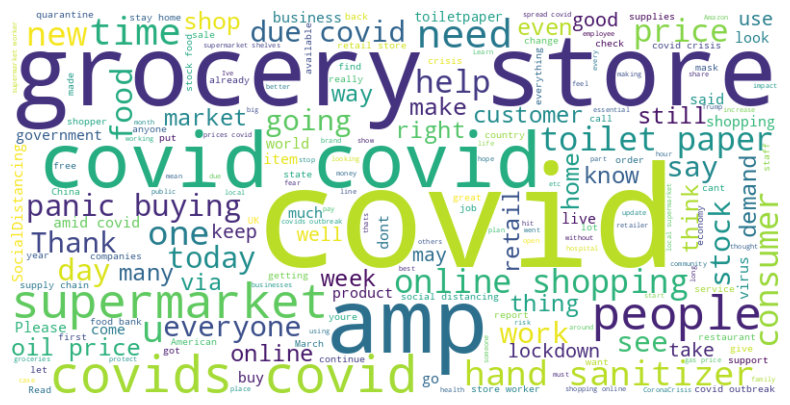

In [ ]:
# YOUR CODE HERE
# Combine all tweets into a single string
all_tweets = ' '.join(train_data['OriginalTweet_removed_stopwords'].astype(str).tolist())

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_data['OriginalTweet_removed_stopwords'])
sequences = tokenizer.texts_to_sequences(train_data['OriginalTweet_removed_stopwords'])

padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

##   **Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation)** (3 Points)

- Download and load  word embeddings  
- Create a weight matrix for words in the training data



In [ ]:
#@title Download Word embeddings

!wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/glove.6B.zip
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# Load GloVe embeddings
embeddings_index = {}
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create a weight matrix for words in the training data
embedding_matrix = np.zeros((MAX_NB_WORDS, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_NB_WORDS:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

##   **Build and Train the Deep Recurrent Model using RNN/LSTM** (2 points)

- Create and Embedding layer to feed to LSTM
    - input_dim: Size of the vocabulary
    - output_dim: Dimension of the dense embedding

- The ouput of embedding layers is fed to LSTM
- Compile the model,train and tweak the hyperparameters
- Calculate the train set accuracy

In [ ]:
# YOUR CODE HERE
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model1.add(LSTM(128))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(5, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(padded_sequences, train_data['Sentiment_encoded'], epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3855 - loss: 1.3862 - val_accuracy: 0.5065 - val_loss: 1.1610
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.5181 - loss: 1.1434 - val_accuracy: 0.5428 - val_loss: 1.1007
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5630 - loss: 1.0559 - val_accuracy: 0.5717 - val_loss: 1.0398
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5979 - loss: 0.9918 - val_accuracy: 0.6032 - val_loss: 1.0083
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6255 - loss: 0.9330 - val_accuracy: 0.6026 - val_loss: 0.9912
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6523 - loss: 0.8782 - val_accuracy: 0.6136 - val_loss: 0.9815
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6768 - loss: 0.8225 - val_accuracy: 0.6237 - val_loss: 0.9566
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7035 - loss: 0.7640 - val_a

In [ ]:
# YOUR CODE HERE
model3 = Sequential()
model3.add(Embedding(MAX_NB_WORDS, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model3.add(LSTM(128, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(64, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(32))
model3.add(Dropout(0.2))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(5, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model3.fit(padded_sequences, train_data['Sentiment_encoded'], epochs=20, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.3601 - loss: 1.4473 - val_accuracy: 0.5004 - val_loss: 1.1811
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.4932 - loss: 1.1955 - val_accuracy: 0.5632 - val_loss: 1.0750
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5543 - loss: 1.0770 - val_accuracy: 0.5989 - val_loss: 0.9989
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6052 - loss: 0.9941 - val_accuracy: 0.6135 - val_loss: 0.9657
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6326 - loss: 0.9385 - val_accuracy: 0.6349 - val_loss: 0.9323
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6648 - loss: 0.8712 - val_accuracy: 0.6540 - val_loss: 0.9021
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.6868 - loss: 0.8192 - val_accuracy: 0.6532 - val_loss: 0.9162
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7134 - loss: 0.7717 - 

In [ ]:
# YOUR CODE HERE
model4 = Sequential()
model4.add(Embedding(MAX_NB_WORDS, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model4.add(LSTM(128, return_sequences=True))
model4.add(Dropout(0.2))
model4.add(LSTM(64, return_sequences=True))
model4.add(Dropout(0.3))
model4.add(LSTM(32))
model4.add(Dropout(0.3))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(5, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model4.fit(padded_sequences, train_data['Sentiment_encoded'], epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.3252 - loss: 1.4880 - val_accuracy: 0.4940 - val_loss: 1.1939
Epoch 2/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.4707 - loss: 1.2551 - val_accuracy: 0.5456 - val_loss: 1.0913
Epoch 3/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5219 - loss: 1.1380 - val_accuracy: 0.5797 - val_loss: 1.0344
Epoch 4/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.5622 - loss: 1.0756 - val_accuracy: 0.6051 - val_loss: 0.9959
Epoch 5/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6031 - loss: 1.0082 - val_accuracy: 0.6175 - val_loss: 0.9669
Epoch 6/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6382 - loss: 0.9449 - val_accuracy: 0.6404 - val_loss: 0.9350
Epoch 7/15
449/450 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6651 - loss: 0.8863Epoch 8/15
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6580 - loss: 0.8944 - val_accuracy: 0.6643 - val_loss: 0.8799
Epoc

##   **Evaluate the Model and get model predictions on the test dataset** (1 Points)

* Evaluate the model on test set







In [ ]:
test_data = pd.read_csv('/content/corona_nlp_test.csv', encoding='ISO-8859-1')
test_data['OriginalTweet_cleaned'] = test_data['OriginalTweet'].apply(lambda x: clean_text(x))
test_data['OriginalTweet_removed_stopwords'] = test_data['OriginalTweet_cleaned'].apply(lambda x: remove_stopwords(x))
test_sequences = tokenizer.texts_to_sequences(test_data['OriginalTweet_removed_stopwords'])
test_padded_sequences = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

test_data['Sentiment_encoded'] = le.transform(test_data['Sentiment'])

In [ ]:
models = [model1,model3,model4]

In [ ]:
for model in models:
  _, test_acc = model.evaluate(test_padded_sequences, test_data['Sentiment_encoded'])
  print('Test accuracy:', test_acc)

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6420 - loss: 0.9631
Test accuracy: 0.641541063785553
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6660 - loss: 1.3261
Test accuracy: 0.6611948609352112
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6653 - loss: 1.0134
Test accuracy: 0.6706867814064026


In [ ]:
import random

In [ ]:
predictions = model4.predict(test_padded_sequences)
predicted_labels = np.argmax(predictions, axis=1)
predicted_sentiments = le.inverse_transform(predicted_labels)
random_samples = random.sample(range(len(test_data)), 5)
for i in range(5):
  print(f"Tweet: {test_data['OriginalTweet'][random_samples[i]]}")
  print(f"Predicted Sentiment: {predicted_sentiments[i]}")
  print(f"Actual Sentiment: {test_data['Sentiment'][random_samples[i]]}")

280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Tweet: ICYMI: This week, Big JohnÃÂs got beef with people hoarding hand sanitizer. @johnisnerwv #Appalachia #COVID19 #coronavirus 
https://t.co/NCPUQwNsfl
Predicted Sentiment: Positive
Actual Sentiment: Positive
Tweet: I do hope the gouging bastards selling hand sanitiser at vastly inflated prices get their comeuppance. #Covid_19
Predicted Sentiment: Positive
Actual Sentiment: Positive
Tweet: "#Grocery workers are beginning to die of #coronavirus." https://t.co/WjSq0JJQlt

Tragic!  Grocery workers should be wearing disposable gloves, masks &amp; googles.

#CoronavirusPandemic / #COVID19
Predicted Sentiment: Positive
Actual Sentiment: Extremely Negative
Tweet: Always important to be weary of scammers and ahead of the game when it comes to recognizing potential threats to your data: https://t.co/MswaBBqXpI #coronascams #coronavirus #FTC #knowsthescams #cybersecurity
Predicted Sentiment: Neutral
Actual Sentiment: Negative
Tweet: Coronavirus: Foo

In [ ]:
np.unique(predicted_labels)

array([0, 1, 2, 3, 4])

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(padded_sequences, train_data['Sentiment_encoded'], epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
 41/450 ━━━━━━━━━━━━━━━━━━━━ 8:54 1s/step - accuracy: 0.2549 - loss: 1.5770

KeyboardInterrupt: 

In [ ]:
_, test_acc = model4.evaluate(test_padded_sequences, test_data['Sentiment_encoded'])
print('Test accuracy:', test_acc)

280/280 ━━━━━━━━━━━━━━━━━━━━ 87s 310ms/step - accuracy: 0.6357 - loss: 0.9609
Test accuracy: 0.6350641846656799
